In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#cargamos dataset
path = '/content/drive/MyDrive/Colab Notebooks/DATOS_COMPLETOS.CSV'
df = pd.read_csv(path, delimiter=';',parse_dates=['DateObserved'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#hay que poner aqui tambien el parse_date para que la fecha salga bien 
df = pd.read_csv(path,delimiter=';',parse_dates=['DateObserved'])
df.head(10)

,Id,Machine,DateStr,DateObserved,H,V,C
0,921880,Batidora,01/09/2018 13:39:16,2018-09-01 13:39:16,0.18,0.14,0.1
1,921881,Batidora,01/09/2018 13:39:46,2018-09-01 13:39:46,0.17,0.15,0.1
2,921882,Batidora,01/09/2018 13:40:15,2018-09-01 13:40:15,0.17,0.17,0.1
3,921883,Batidora,01/09/2018 13:42:56,2018-09-01 13:42:56,0.17,0.16,0.1
4,921884,Batidora,01/09/2018 13:43:26,2018-09-01 13:43:26,0.17,0.19,0.1
5,921885,Batidora,01/09/2018 13:43:56,2018-09-01 13:43:56,0.20,0.18,0.1
6,921886,Batidora,01/09/2018 13:44:26,2018-09-01 13:44:26,0.18,0.17,0.1
7,921887,Batidora,01/09/2018 13:44:55,2018-09-01 13:44:55,0.18,0.17,0.1
8,921888,Batidora,01/09/2018 13:45:25,2018-09-01 13:45:25,0.22,0.16,0.1
9,921889,Batidora,01/09/2018 13:45:55,2018-09-01 13:45:55,0.18,0.16,0.1


In [ ]:
#Miramos si el datatype de cada columna es el que necesitamos. Si no, transformamos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700626 entries, 0 to 700625
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Id            700626 non-null  int64         
 1   Machine       700626 non-null  object        
 2   DateStr       700626 non-null  object        
 3   DateObserved  700626 non-null  datetime64[ns]
 4   H             700598 non-null  float64       
 5   V             700626 non-null  float64       
 6   C             700619 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 37.4+ MB


En efecto la columna DateObserver es tipo datetime

In [ ]:
#examinamos la columna machine, lo que nos permite es mostrar todas las agrupaciones de maquina,
#como solo sale batidora lo podemos elminar(que es lo que haremos en el siguiente paso)
df.Machine.value_counts()

Batidora    700626
Name: Machine, dtype: int64

Toddos los valores de la columna Machine son Batidora, asi que podemos descartar la columna.

In [ ]:
#creamos dataframe con las columnas que nos interesan:
#batidora = df.loc[df['Machine'] == 'Batidora']
batidora = df
cols = ['Id', 'DateStr', 'Machine']
batidora.drop(cols, axis=1, inplace=True)
batidora = batidora.sort_values('DateObserved')#ordena por fechas
batidora = batidora.set_index('DateObserved')
batidora

,H,V,C
DateObserved,,,
2018-09-01 13:39:16,0.18,0.14,0.1
2018-09-01 13:39:46,0.17,0.15,0.1
2018-09-01 13:40:15,0.17,0.17,0.1
2018-09-01 13:42:56,0.17,0.16,0.1
2018-09-01 13:43:26,0.17,0.19,0.1
...,...,...,...
2019-04-30 12:28:48,0.22,0.21,0.1
2019-04-30 12:29:16,0.25,0.23,0.1
2019-04-30 12:29:45,0.24,0.22,0.1


In [ ]:
#miramos cuantos nans hay:
batidora.isnull().sum()

H    28
V     0
C     7
dtype: int64

como son tan pocos respecto al total de valores y voy a tomar medidas de ventanas temporales, podemos eliminarlos sin problema 

In [ ]:
#eliminar los null
batidora.dropna(axis=0, inplace=True)
batidora.isnull().sum()

H    0
V    0
C    0
dtype: int64

# *4. Distribucion de los datos*
Primero represento la distribucion de los datos de las variables

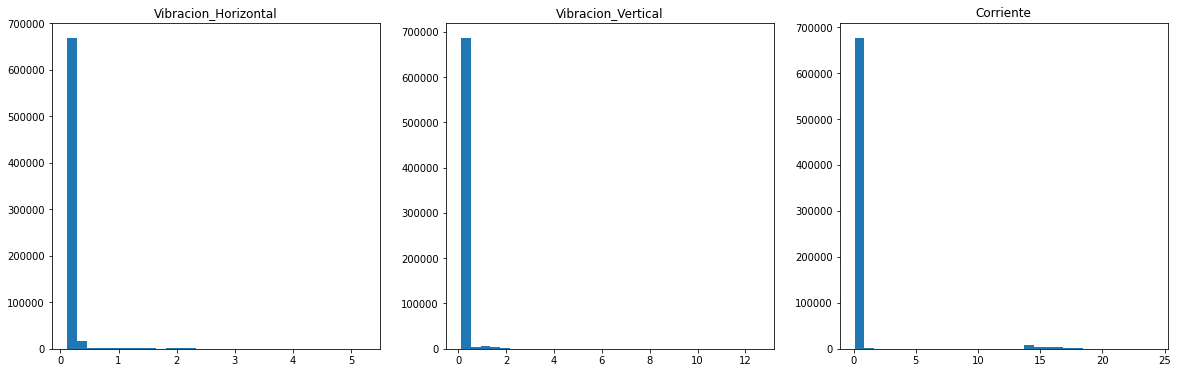

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
dfsub=df

ax[0].hist(dfsub['H'],bins=30)
ax[1].hist(dfsub['V'],bins=30)
ax[2].hist(dfsub['C'],bins=30)

ax[0].title.set_text("Vibracion_Horizontal")
ax[1].title.set_text("Vibracion_Vertical")
ax[2].title.set_text("Corriente")

plt.show()

podemos ver como en nuestras tres graficos hay mas de 600000 datos que estan muy cerca de 0, y despues tengo datos en la cola que estan entre 1 y 2, 0.5 y 2, y 15 y 20.


\Visualizamos la distribuciones de los datos con percentiles

In [ ]:
df.describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))

,H,V,C
count,700598.000000,700626.000000,700619.000000
mean,0.226446,0.243882,0.594269
std,0.191817,0.165516,2.673160
min,0.110000,0.090000,0.080000
10%,0.160000,0.160000,0.090000
25%,0.180000,0.180000,0.090000
50%,0.200000,0.220000,0.100000
75%,0.230000,0.260000,0.100000
90%,0.260000,0.310000,0.100000
95%,0.280000,0.360000,0.110000


Gracias a los percentiles vemos que en el caso de la vibracion horizontal el 95% de los casos estan en 0,28, es algo que resulta interesante ya que se pueden eliminar datos que acabaran siendo outliers

Examinamos gráficamente los datos. Primero veo como se comportan globalmente:

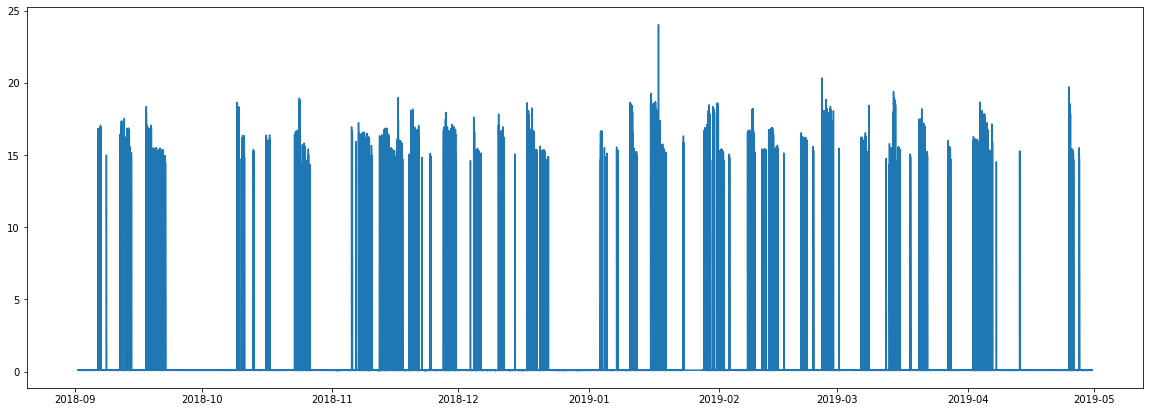

In [ ]:
df = batidora
x=df.index
y=df.C
plt.figure(figsize=(20, 7))
plt.plot(x,y)
plt.show()

vemos que tenemos datos en franjas

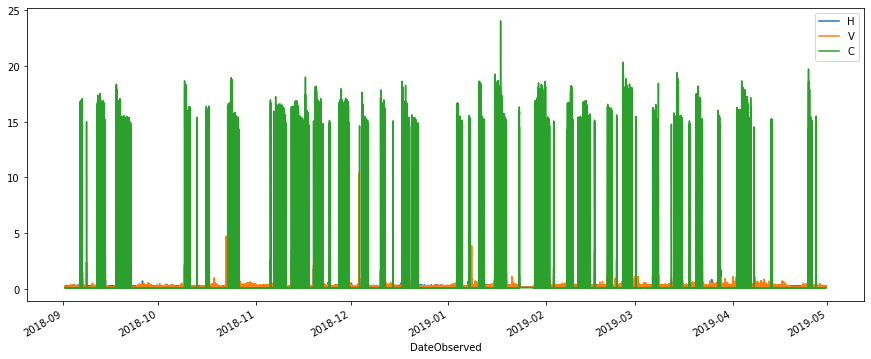

In [ ]:
batidora.plot(figsize=(15, 6))
plt.show()

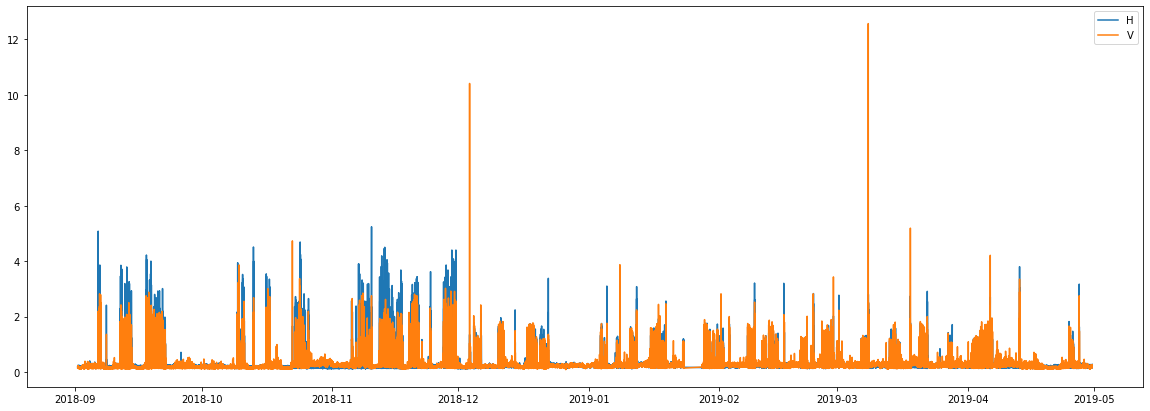

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
df = batidora 
x=df.index

ax.plot(x,df['H'],label='H')
ax.plot(x,df['V'],label='V')
ax.legend()
plt.show()

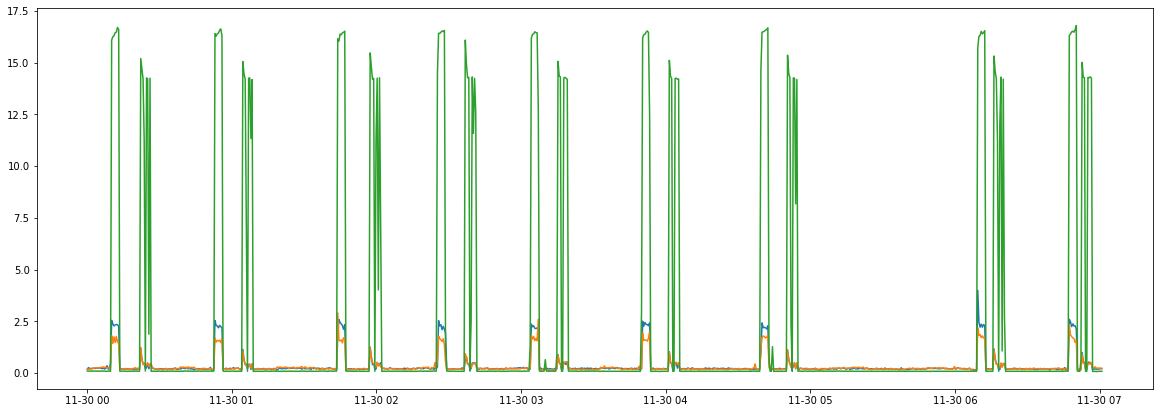

In [ ]:
from IPython.core.pylabtools import figsize
#Ploteo datos de 1 hora:
df7=df.loc['2018-11-30':'2018-11-30 07:00 ']
#df7=df.loc['2018-11-30 04:00':'2018-11-30 06:00 ']

fig, ax = plt.subplots(figsize=(20,7))
x = df7.index
ax.plot(x,df7['H'])
ax.plot(x,df7['V'])
ax.plot(x,df7['C'])
plt.show()


Observamos que hay una mayoria de datos muy proximos a 0. En este caso puede que sea el tiempo en el que la maquina está apagada. Examino la distribución de datos de la variable Corriente(C)

In [ ]:
#Miramos los percentile de sus valores:
df.C.describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))

count    700591.000000
mean          0.594289
std           2.673212
min           0.080000
10%           0.090000
25%           0.090000
50%           0.100000
75%           0.100000
90%           0.100000
95%           0.110000
99%          15.620000
max          24.050000
Name: C, dtype: float64

In [ ]:
#observamos la distribucion de su historiograma:

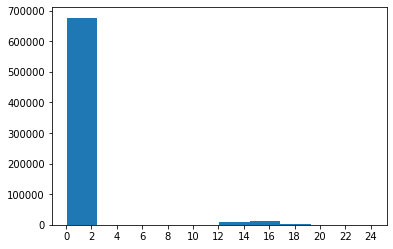

In [ ]:
plt.hist(df.C)#,bins=50)
plt.xticks(np.arange(25, step=2))
plt.show()

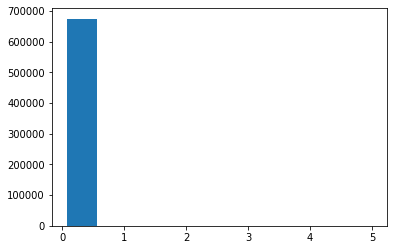

In [ ]:
plt.hist(df[df.C<5]['C'])
plt.show()

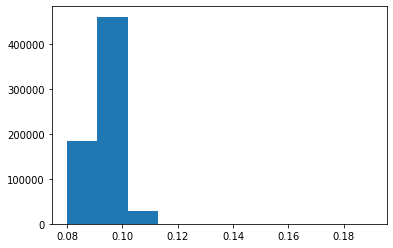

In [ ]:
plt.hist(df[df.C<.2]['C'])
plt.show()

In [ ]:
df.C.value_counts()

0.10     461652
0.09     183551
0.11      29516
14.28       627
14.30       615
          ...  
3.67          1
18.84         1
3.59          1
7.06          1
8.77          1
Name: C, Length: 1556, dtype: int64

In [ ]:
perc=df.C.value_counts().max()/len(df)*100

#no da el resultado, porquE?
print("Un {:.2f%} de los valores de C son 0.1".format(perc))

ValueError: ignored

Parece que durante gran parte del tiempo la corriente oscila entre 0.08 y 0.11, habiendo un gran salto entre ese rango y el resto de los valores.
Dicho rango debe corresponderse con el tiempo en que la máquina está apagada, así que podemos deshacernos de esos datos por que no nos son relevantes.

In [ ]:
df=df[df.C>0.11]
df

,H,V,C
DateObserved,,,
2018-09-06 10:21:25,0.16,0.15,0.12
2018-09-06 10:37:01,5.08,2.18,16.84
2018-09-06 10:37:31,1.93,1.90,16.17
2018-09-06 10:38:01,1.94,1.83,16.18
2018-09-06 10:38:30,1.95,1.77,16.21
...,...,...,...
2019-04-27 11:18:33,0.79,0.85,14.70
2019-04-27 11:19:03,0.80,0.90,14.64
2019-04-27 11:19:31,0.55,0.77,14.48


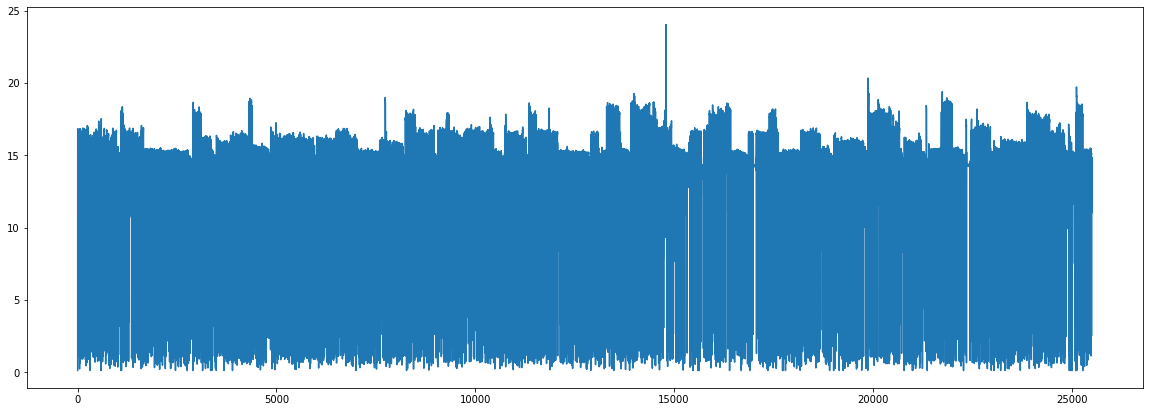

In [ ]:
x=range(len(df))
y=df.C

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.show()

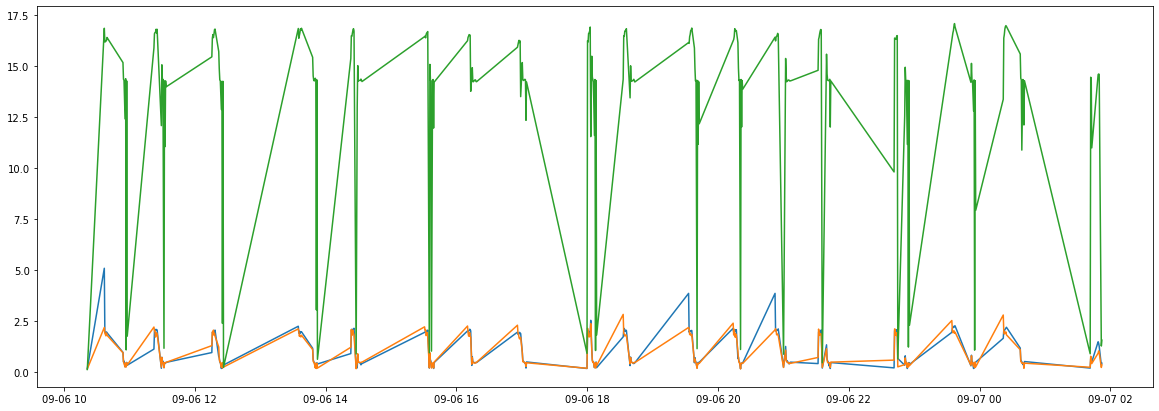

In [ ]:
#Ploteamos las 3 variables en el mismo grafico

dfsub=df.loc['2018-9-6 10':'2018-9-7 02']

fig, ax = plt.subplots(figsize=(20,7))
x=dfsub.index
ax.plot(x,dfsub['H'])
ax.plot(x,dfsub['V'])
ax.plot(x,dfsub['C'])
plt.show()

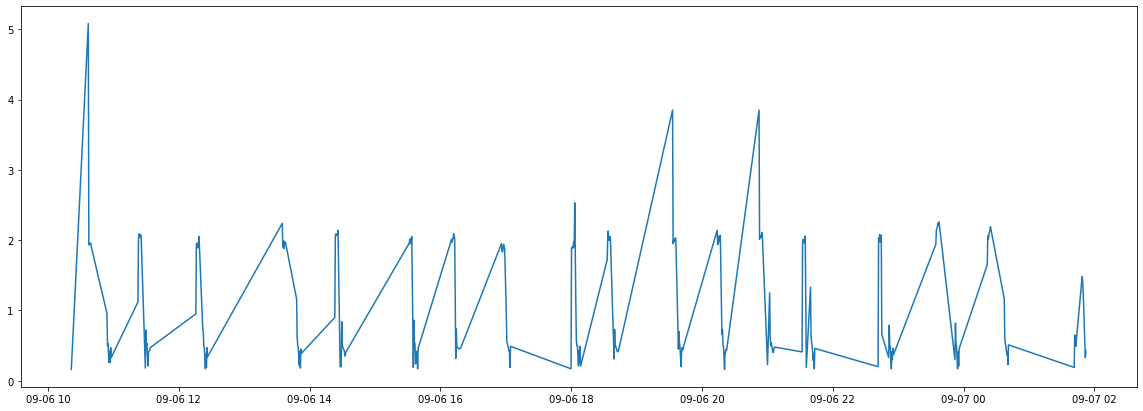

In [ ]:
#Ploteamos solo H
plt.figure(figsize=(20,7))
plt.plot(x,dfsub['H'])
plt.show()

  Estudiamos la correlacion entre las variables

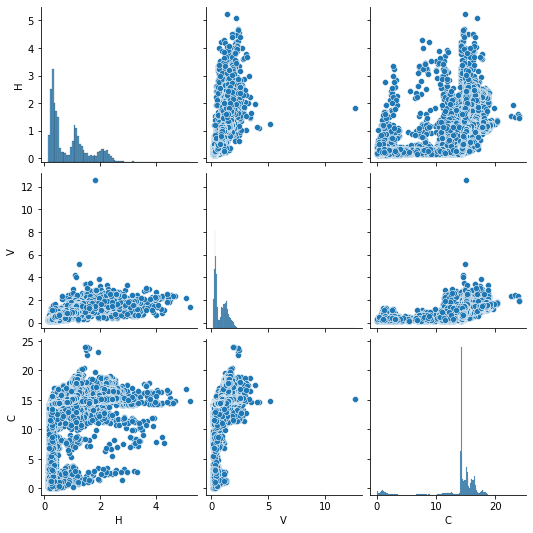

In [ ]:
sns.pairplot(df)
plt.show()

visualmente vemos còmo H y C no muestran una relacion apreciable, pero V sí muestra cierta relacion lineal tanto con H como con C

con .corr() podemos ver la correlacionn entre las variables. En qué grado están relacionadas linealmente:

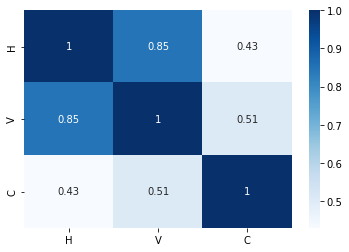

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Usando el método OLS también podemos estudiar la relación entre las variables. Si por ejemplo nos fijamos en el p-valor(P>|t|), sabemos que si es muy cercano a 0 hay una alta probabilidad de que ambas variables estén relacionadas:

In [ ]:
import statsmodels.api as sm
#comparamos la Corriente con las otras dos 
slr_model = sm.OLS(df['C'], df[['H','V']]) #Ordinary Leas Squares
slr_reg = slr_model.fit()

slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      C   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          4.584e+04
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        00:06:30   Log-Likelihood:                         -84721.
No. Observations:               25521   AIC:                                  1.694e+05
Df Residuals:                   25519   BIC:                                  1.695e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
H             -0.3664      0.113     -3.248      0.001      -0.587      -0.145
V             13.1216      0.130    100.959      0.000      12.867      13.376
==============================================================================
Omnibus:                    10035.333   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           316915.740
Skew:                          -1.264   Prob(JB):                         0.00
Kurtosis:                      20.077   Cond. No.                         6.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
slr_model = sm.OLS(df['H'], df['V'])
slr_reg = slr_model.fit()
#se comparan las dos 
slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      H   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          2.187e+05
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        00:08:35   Log-Likelihood:                         -10927.
No. Observations:               25521   AIC:                                  2.186e+04
Df Residuals:                   25520   BIC:                                  2.186e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V              1.0903      0.002    467.609      0.000       1.086       1.095
==============================================================================
Omnibus:                     9218.001   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2644755.210
Skew:                           0.445   Prob(JB):                         0.00
Kurtosis:                      52.863   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que en todos los casos el p-valor es 0 o cercano a 0. Si el p-valor es muy cercano a 0(<0.05) hay alta probabilidad de que la hipótesis nula sea falsa, por ende, estan relacionadas entre si 

In [ ]:
x=df.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled =scaler.fit_transform(x)

In [ ]:
x_scaled

array([[0.00587084, 0.00160772, 0.        ],
       [0.96868885, 0.164791  , 0.69870455],
       [0.35225049, 0.14228296, 0.67070623],
       ...,
       [0.08219178, 0.05144695, 0.60008358],
       [0.07632094, 0.0522508 , 0.59924781],
       [0.08023483, 0.04823151, 0.60259089]])

In [ ]:
x_scaled.shape

(25521, 3)

In [ ]:
dfscaled=pd.DataFrame(x_scaled, columns=['H', 'V', 'C'])
dfscaled

,H,V,C
0,0.005871,0.001608,0.000000
1,0.968689,0.164791,0.698705
2,0.352250,0.142283,0.670706
3,0.354207,0.136656,0.671124
4,0.356164,0.131833,0.672378
...,...,...,...
25516,0.129159,0.057878,0.609277
25517,0.131115,0.061897,0.606770
25518,0.082192,0.051447,0.600084
25519,0.076321,0.052251,0.599248


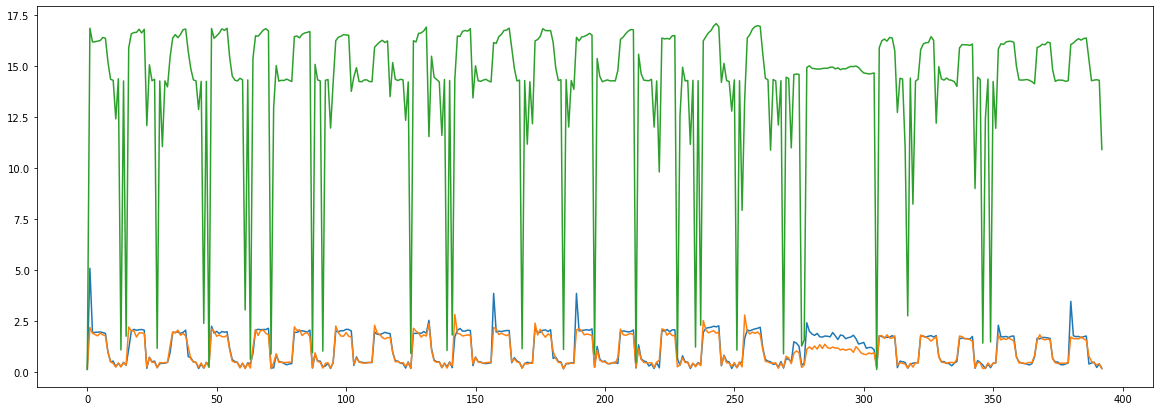

In [ ]:
#dfsub=df.loc["2018-9-6 10":"2018-9-7 02"]
dfsub=df.iloc[:393]

fig, ax = plt.subplots(figsize=(20,7))
x = range(len(dfsub))
ax.plot(x, dfsub['H'])
ax.plot(x, dfsub['V'])
ax.plot(x, dfsub['C'])
plt.show()

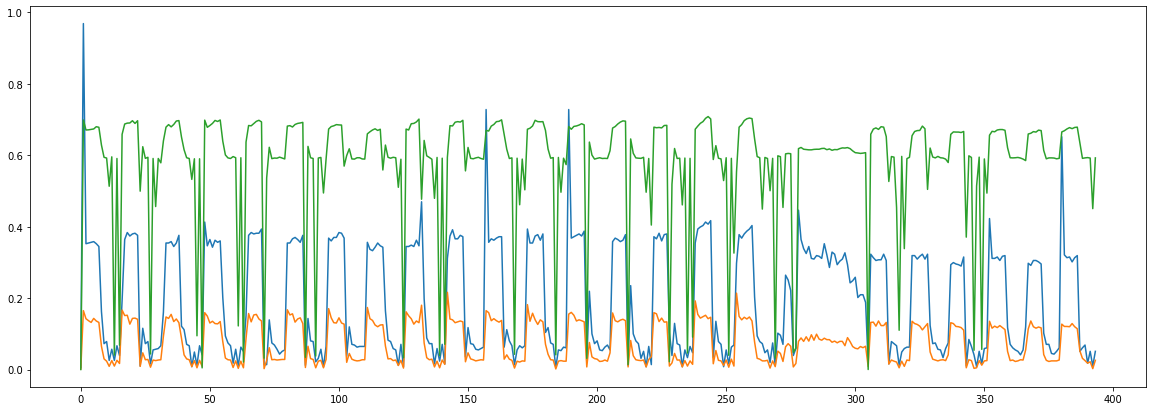

In [ ]:
dfsub=dfscaled.loc[:393]

fig, ax = plt.subplots(figsize=(20,7))
x = dfsub.index
ax.plot(x, dfsub['H'])
ax.plot(x, dfsub['V'])
ax.plot(x, dfsub['C'])
plt.show()

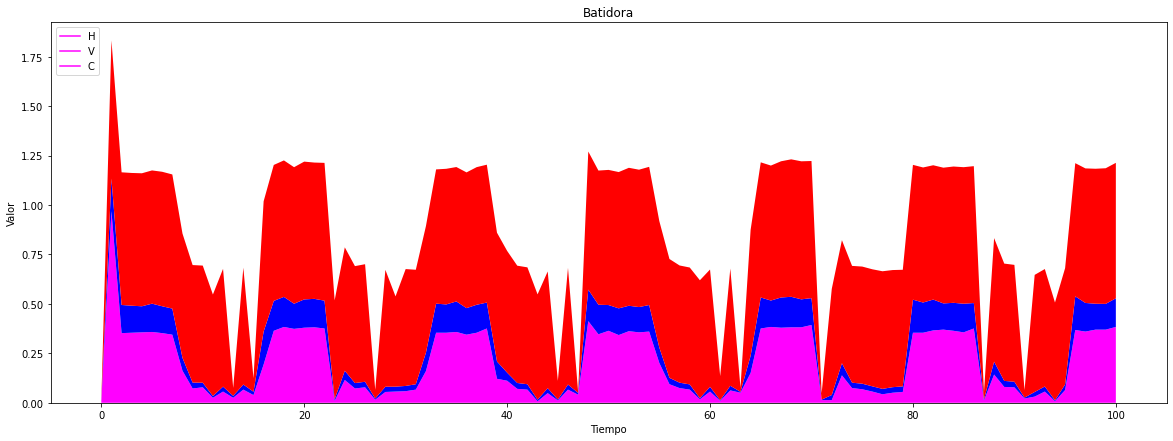

In [ ]:
#Graficación den pilas
dfsub = dfscaled.loc[:100]
x = dfsub.index

fig, ax = plt.subplots(figsize=(20,7))
plt.plot([],[], color ='magenta', label = 'H')
plt.plot([],[], color ='magenta', label = 'V')
plt.plot([],[], color ='magenta', label = 'C')

plt.stackplot(x, dfsub['H'], dfsub['V'], dfsub['C'], colors = ['magenta','blue','red'])
plt.legend(loc=2)
plt.title('Batidora')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

Distribución de los valores de cada variable en historiogramas:

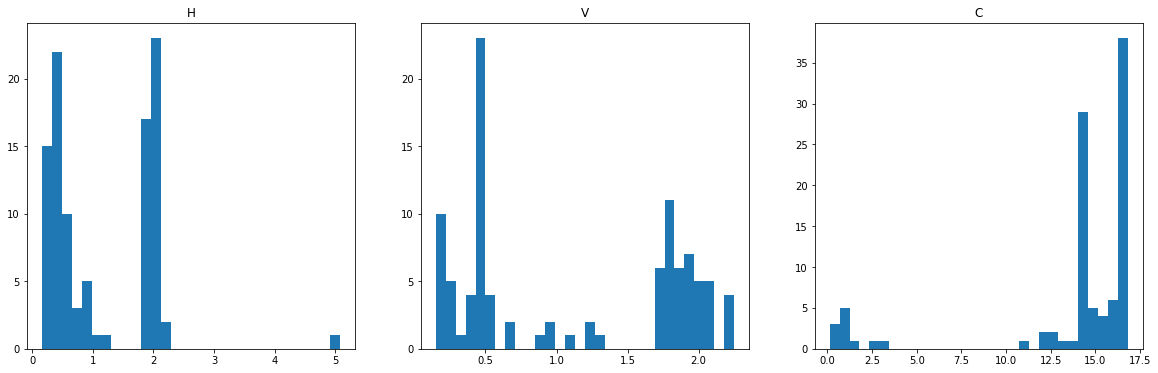

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
dfsub=df.iloc[:100]

ax[0].hist(dfsub['H'],bins=30)
ax[1].hist(dfsub['V'],bins=30)
ax[2].hist(dfsub['C'],bins=30)

ax[0].title.set_text('H')
ax[1].title.set_text('V')
ax[2].title.set_text('C')

plt.show()

como conclusion estan altamente correlacionados, la H y V y es un maquina discontnua con patrones.